In [1]:
import pandas as pd
import os

# Define the folder path containing the CSV files
folder_path = "/Users/adityakoushik/Desktop/DATATHON DOCUMENTS "

# Initialize an empty list to store DataFrames
dataframes = []

# Read all CSV files in the folder and store them in the list
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, file))
        df = df.drop(columns=['placeDcid'])
        dataframes.append(df)


In [2]:
import pandas as pd
from functools import reduce

# Step 1: Find the intersection of counties across all dataframes
intersection_counties = reduce(lambda x, y: set(x).intersection(set(y)), [df['placeName'] for df in dataframes])

# Step 2: Filter each dataframe to keep only the intersection counties
filtered_dataframes = [df[df['placeName'].isin(intersection_counties)] for df in dataframes]

# Step 3: Concatenate the filtered dataframes
df = pd.concat(filtered_dataframes, axis=1, ignore_index=False)

# Resetting index to ensure clean data alignment
df = df.reset_index(drop=True)



In [4]:
df

,placeName,Date:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Source:Percent_Person_WithChronicObstructivePulmonaryDisease,Date:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithCoronaryHeartDisease,Source:Percent_Person_WithCoronaryHeartDisease,Date:Percent_Person_WithDiabetes,Value:Percent_Person_WithDiabetes,Source:Percent_Person_WithDiabetes,...,Value:Percent_Person_Smoking,Source:Percent_Person_Smoking,placeName,Date:Median_Income_Household,Value:Median_Income_Household,Source:Median_Income_Household,placeName,Date:Percent_Person_BingeDrinking,Value:Percent_Person_BingeDrinking,Source:Percent_Person_BingeDrinking
0,Autauga County,2022.0,6.8,https://www.cdc.gov/places/index.html,2022.0,6.2,https://www.cdc.gov/places/index.html,2022.0,11.3,https://www.cdc.gov/places/index.html,...,15.4,https://www.cdc.gov/places/index.html,Autauga County,2022.0,68315.0,https://www.census.gov/programs-surveys/acs/da...,Autauga County,2022.0,16.6,https://www.cdc.gov/places/index.html
1,Baldwin County,2022.0,6.4,https://www.cdc.gov/places/index.html,2022.0,6.0,https://www.cdc.gov/places/index.html,2022.0,10.2,https://www.cdc.gov/places/index.html,...,14.7,https://www.cdc.gov/places/index.html,Baldwin County,2022.0,71039.0,https://www.census.gov/programs-surveys/acs/da...,Baldwin County,2022.0,18.2,https://www.cdc.gov/places/index.html
2,Barbour County,2022.0,9.8,https://www.cdc.gov/places/index.html,2022.0,8.2,https://www.cdc.gov/places/index.html,2022.0,16.0,https://www.cdc.gov/places/index.html,...,21.9,https://www.cdc.gov/places/index.html,Barbour County,2022.0,39712.0,https://www.census.gov/programs-surveys/acs/da...,Barbour County,2022.0,13.7,https://www.cdc.gov/places/index.html
3,Bibb County,2022.0,9.3,https://www.cdc.gov/places/index.html,2022.0,7.5,https://www.cdc.gov/places/index.html,2022.0,13.3,https://www.cdc.gov/places/index.html,...,21.8,https://www.cdc.gov/places/index.html,Bibb County,2022.0,50669.0,https://www.census.gov/programs-surveys/acs/da...,Bibb County,2022.0,15.6,https://www.cdc.gov/places/index.html
4,Blount County,2022.0,8.8,https://www.cdc.gov/places/index.html,2022.0,7.3,https://www.cdc.gov/places/index.html,2022.0,11.6,https://www.cdc.gov/places/index.html,...,19.5,https://www.cdc.gov/places/index.html,Blount County,2022.0,57440.0,https://www.census.gov/programs-surveys/acs/da...,Blount County,2022.0,17.1,https://www.cdc.gov/places/index.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()

In [9]:
df

,placeName,Date:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Source:Percent_Person_WithChronicObstructivePulmonaryDisease,Date:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithCoronaryHeartDisease,Source:Percent_Person_WithCoronaryHeartDisease,Date:Percent_Person_WithDiabetes,Value:Percent_Person_WithDiabetes,Source:Percent_Person_WithDiabetes,...,Value:Percent_Person_Smoking,Source:Percent_Person_Smoking,placeName,Date:Median_Income_Household,Value:Median_Income_Household,Source:Median_Income_Household,placeName,Date:Percent_Person_BingeDrinking,Value:Percent_Person_BingeDrinking,Source:Percent_Person_BingeDrinking
0,Autauga County,2022.0,6.8,https://www.cdc.gov/places/index.html,2022.0,6.2,https://www.cdc.gov/places/index.html,2022.0,11.3,https://www.cdc.gov/places/index.html,...,15.4,https://www.cdc.gov/places/index.html,Autauga County,2022.0,68315.0,https://www.census.gov/programs-surveys/acs/da...,Autauga County,2022.0,16.6,https://www.cdc.gov/places/index.html
1,Baldwin County,2022.0,6.4,https://www.cdc.gov/places/index.html,2022.0,6.0,https://www.cdc.gov/places/index.html,2022.0,10.2,https://www.cdc.gov/places/index.html,...,14.7,https://www.cdc.gov/places/index.html,Baldwin County,2022.0,71039.0,https://www.census.gov/programs-surveys/acs/da...,Baldwin County,2022.0,18.2,https://www.cdc.gov/places/index.html
2,Barbour County,2022.0,9.8,https://www.cdc.gov/places/index.html,2022.0,8.2,https://www.cdc.gov/places/index.html,2022.0,16.0,https://www.cdc.gov/places/index.html,...,21.9,https://www.cdc.gov/places/index.html,Barbour County,2022.0,39712.0,https://www.census.gov/programs-surveys/acs/da...,Barbour County,2022.0,13.7,https://www.cdc.gov/places/index.html
3,Bibb County,2022.0,9.3,https://www.cdc.gov/places/index.html,2022.0,7.5,https://www.cdc.gov/places/index.html,2022.0,13.3,https://www.cdc.gov/places/index.html,...,21.8,https://www.cdc.gov/places/index.html,Bibb County,2022.0,50669.0,https://www.census.gov/programs-surveys/acs/da...,Bibb County,2022.0,15.6,https://www.cdc.gov/places/index.html
4,Blount County,2022.0,8.8,https://www.cdc.gov/places/index.html,2022.0,7.3,https://www.cdc.gov/places/index.html,2022.0,11.6,https://www.cdc.gov/places/index.html,...,19.5,https://www.cdc.gov/places/index.html,Blount County,2022.0,57440.0,https://www.census.gov/programs-surveys/acs/da...,Blount County,2022.0,17.1,https://www.cdc.gov/places/index.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Roane County,2022.0,12.1,https://www.cdc.gov/places/index.html,2022.0,8.3,https://www.cdc.gov/places/index.html,2022.0,13.9,https://www.cdc.gov/places/index.html,...,16.8,https://www.cdc.gov/places/index.html,Nicholas County,2022.0,48826.0,https://www.census.gov/programs-surveys/acs/da...,Roane County,2022.0,15.8,https://www.cdc.gov/places/index.html
2923,Summers County,2022.0,11.2,https://www.cdc.gov/places/index.html,2022.0,7.8,https://www.cdc.gov/places/index.html,2022.0,13.7,https://www.cdc.gov/places/index.html,...,22.3,https://www.cdc.gov/places/index.html,Ohio County,2022.0,55521.0,https://www.census.gov/programs-surveys/acs/da...,Summers County,2022.0,15.7,https://www.cdc.gov/places/index.html
2924,Taylor County,2022.0,11.2,https://www.cdc.gov/places/index.html,2022.0,7.8,https://www.cdc.gov/places/index.html,2022.0,13.1,https://www.cdc.gov/places/index.html,...,21.3,https://www.cdc.gov/places/index.html,Pendleton County,2022.0,52458.0,https://www.census.gov/programs-surveys/acs/da...,Taylor County,2022.0,16.6,https://www.cdc.gov/places/index.html
2925,Tucker County,2022.0,8.7,https://www.cdc.gov/places/index.html,2022.0,6.7,https://www.cdc.gov/places/index.html,2022.0,11.3,https://www.cdc.gov/places/index.html,...,26.5,https://www.cdc.gov/places/index.html,Pleasants County,2022.0,59666.0,https://www.census.gov/programs-surveys/acs/da...,Tucker County,2022.0,17.7,https://www.cdc.gov/places/inde

In [11]:
df2 = df['placeName']

In [13]:
df2= df2.iloc[:, 0]

In [15]:
#only care about columns which have a value
df = df[[col for col in df.columns if col.split(':')[0] == 'Value']]

In [17]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,...,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Percent_Person_WithMentalHealthNotGood,Value:Percent_Person_WithMentalHealthNotGood,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household,Value:Percent_Person_BingeDrinking,Value:Percent_Person_BingeDrinking
0,6.8,6.2,11.3,43129000.0,39.0,24.3,15363.0,15363.0,437.0,216.0,...,7080.0,7741.0,4269.0,18.0,18.0,94.234,15.4,68315.0,16.6,16.6
1,6.4,6.0,10.2,579733000.0,43.7,25.1,61277.0,61277.0,2351.0,681.0,...,28223.0,38546.0,15233.0,18.2,18.2,89.200,14.7,71039.0,18.2,18.2
2,9.8,8.2,16.0,16773000.0,40.6,23.5,5722.0,5722.0,105.0,98.0,...,3002.0,2887.0,1387.0,21.1,21.1,97.536,21.9,39712.0,13.7,13.7
3,9.3,7.5,13.3,5253000.0,40.3,26.6,4871.0,4871.0,76.0,105.0,...,1836.0,2539.0,1384.0,21.3,21.3,88.900,21.8,50669.0,15.6,15.6
4,8.8,7.3,11.6,20091000.0,40.8,28.0,15416.0,15416.0,156.0,243.0,...,5375.0,7072.0,4861.0,21.1,21.1,118.900,19.5,57440.0,17.1,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,12.1,8.3,13.9,130135000.0,46.1,31.8,3250.0,3250.0,18.0,116.0,...,3100.0,3366.0,1906.0,25.7,20.1,20.600,16.8,48826.0,18.1,15.8
2923,11.2,7.8,13.7,6967000.0,49.9,30.0,2858.0,2858.0,43.0,61.0,...,6579.0,6297.0,1871.0,24.0,22.2,33.900,22.3,55521.0,16.6,15.7
2924,11.2,7.8,13.1,36226000.0,44.3,30.7,4313.0,4313.0,124.0,36.0,...,485.0,844.0,615.0,23.9,22.2,31.500,21.3,52458.0,18.4,16.6
2925,8.7,6.7,11.3,34981000.0,50.9,28.6,1750.0,1750.0,50.0,144.0,...,758.0,1190.0,475.0,21.3,24.2,30.700,26.5,59666.0,17.7,17.7


In [21]:
if len(df) == len(df2):
    # Reset index for both DataFrames to ensure proper alignment
    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    
    # Concatenate the two DataFrames column-wise (axis=1)
    df = pd.concat([df, df2], axis=1)

In [23]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,...,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Percent_Person_WithMentalHealthNotGood,Value:Percent_Person_WithMentalHealthNotGood,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household,Value:Percent_Person_BingeDrinking,Value:Percent_Person_BingeDrinking,placeName
0,6.8,6.2,11.3,43129000.0,39.0,24.3,15363.0,15363.0,437.0,216.0,...,7741.0,4269.0,18.0,18.0,94.234,15.4,68315.0,16.6,16.6,Autauga County
1,6.4,6.0,10.2,579733000.0,43.7,25.1,61277.0,61277.0,2351.0,681.0,...,38546.0,15233.0,18.2,18.2,89.200,14.7,71039.0,18.2,18.2,Baldwin County
2,9.8,8.2,16.0,16773000.0,40.6,23.5,5722.0,5722.0,105.0,98.0,...,2887.0,1387.0,21.1,21.1,97.536,21.9,39712.0,13.7,13.7,Barbour County
3,9.3,7.5,13.3,5253000.0,40.3,26.6,4871.0,4871.0,76.0,105.0,...,2539.0,1384.0,21.3,21.3,88.900,21.8,50669.0,15.6,15.6,Bibb County
4,8.8,7.3,11.6,20091000.0,40.8,28.0,15416.0,15416.0,156.0,243.0,...,7072.0,4861.0,21.1,21.1,118.900,19.5,57440.0,17.1,17.1,Blount County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,12.1,8.3,13.9,130135000.0,46.1,31.8,3250.0,3250.0,18.0,116.0,...,3366.0,1906.0,25.7,20.1,20.600,16.8,48826.0,18.1,15.8,Roane County
2680,11.2,7.8,13.7,6967000.0,49.9,30.0,2858.0,2858.0,43.0,61.0,...,6297.0,1871.0,24.0,22.2,33.900,22.3,55521.0,16.6,15.7,Summers County
2681,11.2,7.8,13.1,36226000.0,44.3,30.7,4313.0,4313.0,124.0,36.0,...,844.0,615.0,23.9,22.2,31.500,21.3,52458.0,18.4,16.6,Taylor County
2682,8.7,6.7,11.3,34981000.0,50.9,28.6,1750.0,1750.0,50.0,144.0,...,1190.0,475.0,21.3,24.2,30.700,26.5,59666.0,17.7,17.7,Tucker County


In [25]:
df = df.loc[:, ~df.T.duplicated(keep='first')]

In [27]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,Value:UnemploymentRate_Person,...,Value:Median_Income_Person,Value:Monthly_Median_GrossRent_HousingUnit,Value:Count_Household_With0AvailableVehicles,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household,placeName
0,6.8,6.2,11.3,43129000.0,39.0,24.3,15363.0,437.0,216.0,2.2,...,34620.0,1199.0,888.0,7080.0,7741.0,4269.0,94.234,15.4,68315.0,Autauga County
1,6.4,6.0,10.2,579733000.0,43.7,25.1,61277.0,2351.0,681.0,2.3,...,34221.0,1160.0,2056.0,28223.0,38546.0,15233.0,89.200,14.7,71039.0,Baldwin County
2,9.8,8.2,16.0,16773000.0,40.6,23.5,5722.0,105.0,98.0,4.0,...,22479.0,627.0,1058.0,3002.0,2887.0,1387.0,97.536,21.9,39712.0,Barbour County
3,9.3,7.5,13.3,5253000.0,40.3,26.6,4871.0,76.0,105.0,2.4,...,25799.0,765.0,544.0,1836.0,2539.0,1384.0,88.900,21.8,50669.0,Bibb County
4,8.8,7.3,11.6,20091000.0,40.8,28.0,15416.0,156.0,243.0,2.2,...,29572.0,734.0,1047.0,5375.0,7072.0,4861.0,118.900,19.5,57440.0,Blount County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,12.1,8.3,13.9,130135000.0,46.1,31.8,3250.0,18.0,116.0,2.6,...,26208.0,657.0,639.0,3100.0,3366.0,1906.0,20.600,16.8,48826.0,Roane County
2680,11.2,7.8,13.7,6967000.0,49.9,30.0,2858.0,43.0,61.0,5.3,...,30749.0,605.0,2099.0,6579.0,6297.0,1871.0,33.900,22.3,55521.0,Summers County
2681,11.2,7.8,13.1,36226000.0,44.3,30.7,4313.0,124.0,36.0,4.1,...,25491.0,842.0,103.0,485.0,844.0,615.0,31.500,21.3,52458.0,Taylor County
2682,8.7,6.7,11.3,34981000.0,50.9,28.6,1750.0,50.0,144.0,4.0,...,31680.0,702.0,120.0,758.0,1190.0,475.0,30.700,26.5,59666.0,Tucker County


In [29]:
df.columns

Index(['Value:Percent_Person_WithChronicObstructivePulmonaryDisease',
       'Value:Percent_Person_WithCoronaryHeartDisease',
       'Value:Percent_Person_WithDiabetes',
       'Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue',
       'Value:Median_Age_Person',
       'Value:Percent_Person_18OrMoreYears_WithDepression',
       'Value:Count_Household_FamilyHousehold',
       'Value:Count_Person_EducationalAttainmentDoctorateDegree',
       'Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased',
       'Value:UnemploymentRate_Person', 'Value:Count_HousingUnit',
       'Value:Percent_Person_Obesity',
       'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HouseholdCharacteristics',
       'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HousingTypeAndTransportation',
       'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_SocioeconomicStatus',
      

In [31]:
df2 = df[['Value:Count_Person', 'Value:Count_HousingUnit', 'Value:Count_Household']]


In [33]:
df = df.drop(['Value:Count_Person', 'Value:Count_HousingUnit', 'Value:Count_Household'], axis=1)


In [35]:
df2


,Value:Count_Person,Value:Count_HousingUnit,Value:Count_Household
0,59726.0,24457.0,22308.0
1,246531.0,125113.0,90802.0
2,24700.0,11673.0,9016.0
3,21986.0,9046.0,7216.0
4,59516.0,24677.0,21626.0
...,...,...,...
2679,13833.0,7174.0,9644.0
2680,11702.0,6598.0,17487.0
2681,16410.0,7444.0,2361.0
2682,6620.0,4696.0,2737.0


In [37]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,Value:UnemploymentRate_Person,...,Value:Median_Income_Person,Value:Monthly_Median_GrossRent_HousingUnit,Value:Count_Household_With0AvailableVehicles,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household,placeName
0,6.8,6.2,11.3,43129000.0,39.0,24.3,15363.0,437.0,216.0,2.2,...,34620.0,1199.0,888.0,7080.0,7741.0,4269.0,94.234,15.4,68315.0,Autauga County
1,6.4,6.0,10.2,579733000.0,43.7,25.1,61277.0,2351.0,681.0,2.3,...,34221.0,1160.0,2056.0,28223.0,38546.0,15233.0,89.200,14.7,71039.0,Baldwin County
2,9.8,8.2,16.0,16773000.0,40.6,23.5,5722.0,105.0,98.0,4.0,...,22479.0,627.0,1058.0,3002.0,2887.0,1387.0,97.536,21.9,39712.0,Barbour County
3,9.3,7.5,13.3,5253000.0,40.3,26.6,4871.0,76.0,105.0,2.4,...,25799.0,765.0,544.0,1836.0,2539.0,1384.0,88.900,21.8,50669.0,Bibb County
4,8.8,7.3,11.6,20091000.0,40.8,28.0,15416.0,156.0,243.0,2.2,...,29572.0,734.0,1047.0,5375.0,7072.0,4861.0,118.900,19.5,57440.0,Blount County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,12.1,8.3,13.9,130135000.0,46.1,31.8,3250.0,18.0,116.0,2.6,...,26208.0,657.0,639.0,3100.0,3366.0,1906.0,20.600,16.8,48826.0,Roane County
2680,11.2,7.8,13.7,6967000.0,49.9,30.0,2858.0,43.0,61.0,5.3,...,30749.0,605.0,2099.0,6579.0,6297.0,1871.0,33.900,22.3,55521.0,Summers County
2681,11.2,7.8,13.1,36226000.0,44.3,30.7,4313.0,124.0,36.0,4.1,...,25491.0,842.0,103.0,485.0,844.0,615.0,31.500,21.3,52458.0,Taylor County
2682,8.7,6.7,11.3,34981000.0,50.9,28.6,1750.0,50.0,144.0,4.0,...,31680.0,702.0,120.0,758.0,1190.0,475.0,30.700,26.5,59666.0,Tucker County


In [39]:
import pandas as pd

# Define the lists of columns
q = [
    "Value:Count_Household_With0AvailableVehicles",
    "Value:Count_Household_With1AvailableVehicles",
    "Value:Count_Household_With2AvailableVehicles",
    "Value:Count_Household_With3AvailableVehicles",
    "Value:Count_Household_FamilyHousehold",
    "Value:Count_Household_WithFoodStampsInThePast12Months_FamilyHousehold",
    "Value:Count_Household_WithInternetSubscription",
    "Value:Count_Household_SingleFatherFamilyHousehold",
    "Value:Count_Household_SingleMotherFamilyHousehold"
]

qqq = [
    "Value:Count_Person_Years16Onwards_WorkedFromHome_WorkCommute_Employed",
    "Value:Count_Person_Years16Onwards_Bicycle_WorkCommute_Employed",
    "Value:Count_Person_Years16Onwards_CarTruckOrVan_WorkCommute_Employed",
    "Value:Count_Person_Years16Onwards_DroveAlone_WorkCommute_Employed",
    "Value:Count_Person_Years16Onwards_PublicTransportationExcludingTaxicab_WorkCommute_Employed",
    "Value:Count_Person_Years16Onwards_Walked_WorkCommute_Employed",
    "Value:Count_Person_WithHealthInsurance",
    "Value:Count_Person_Employed",
    "Value:Count_Person_EducationalAttainmentDoctorateDegree",
    "Value:Count_Person_EducationalAttainmentBachelorsDegree",
    "Value:Count_Person_WhiteAlone",
    "Value:Count_Person_AmericanIndianAndAlaskaNativeAlone",
    "Value:Count_Person_HispanicOrLatino",
    "Value:Count_Person_Male_BlackOrAfricanAmericanAloneOrInCombinationWithOneOrMoreOtherRaces",
    "Value:Count_Person_AsianAlone",
    "Value:Count_Person_EducationalAttainmentRegularHighSchoolDiploma",
    "Value:Count_Person_BelowPovertyLevelInThePast12Months",
    "Value:Count_Person_WithMedicareCoverageOnly"
]

# Perform the row-wise division
# Columns in 'q' divided by the third column in df2
df[q] = df[q].div(df2.iloc[:, 2], axis=0)

# Columns in 'qqq' divided by the first column in df2
df[qqq] = df[qqq].div(df2.iloc[:, 0], axis=0)



In [41]:
y = df['placeName']
df = df.drop('placeName', axis = 1)

In [43]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,Value:UnemploymentRate_Person,...,Value:Count_Person_EducationalAttainmentBachelorsDegree,Value:Median_Income_Person,Value:Monthly_Median_GrossRent_HousingUnit,Value:Count_Household_With0AvailableVehicles,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household
0,6.8,6.2,11.3,43129000.0,39.0,24.3,0.688677,0.007317,216.0,2.2,...,0.112614,34620.0,1199.0,0.039806,0.317375,0.347006,0.191366,94.234,15.4,68315.0
1,6.4,6.0,10.2,579733000.0,43.7,25.1,0.674842,0.009536,681.0,2.3,...,0.135780,34221.0,1160.0,0.022643,0.310819,0.424506,0.167761,89.200,14.7,71039.0
2,9.8,8.2,16.0,16773000.0,40.6,23.5,0.634650,0.004251,98.0,4.0,...,0.047247,22479.0,627.0,0.117347,0.332964,0.320209,0.153838,97.536,21.9,39712.0
3,9.3,7.5,13.3,5253000.0,40.3,26.6,0.675028,0.003457,105.0,2.4,...,0.047621,25799.0,765.0,0.075388,0.254435,0.351857,0.191796,88.900,21.8,50669.0
4,8.8,7.3,11.6,20091000.0,40.8,28.0,0.712846,0.002621,243.0,2.2,...,0.064520,29572.0,734.0,0.048414,0.248543,0.327014,0.224776,118.900,19.5,57440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,12.1,8.3,13.9,130135000.0,46.1,31.8,0.336997,0.001301,116.0,2.6,...,0.066291,26208.0,657.0,0.066259,0.321443,0.349025,0.197636,20.600,16.8,48826.0
2680,11.2,7.8,13.7,6967000.0,49.9,30.0,0.163436,0.003675,61.0,5.3,...,0.083746,30749.0,605.0,0.120032,0.376222,0.360096,0.106994,33.900,22.3,55521.0
2681,11.2,7.8,13.1,36226000.0,44.3,30.7,1.826768,0.007556,36.0,4.1,...,0.092261,25491.0,842.0,0.043626,0.205421,0.357476,0.260483,31.500,21.3,52458.0
2682,8.7,6.7,11.3,34981000.0,50.9,28.6,0.639386,0.007553,144.0,4.0,...,0.111480,31680.0,702.0,0.043844,0.276946,0.434783,0.173548,30.700,26.5,59666.0


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to exclude
exclude_columns = set(q + qqq)

# Identify columns to scale
columns_to_scale = [
    col for col in df.columns 
    if 'percent' not in col.lower() and col not in exclude_columns
]

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the identified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [47]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,Value:UnemploymentRate_Person,...,Value:Count_Person_EducationalAttainmentBachelorsDegree,Value:Median_Income_Person,Value:Monthly_Median_GrossRent_HousingUnit,Value:Count_Household_With0AvailableVehicles,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household
0,6.8,6.2,11.3,0.001180,0.430693,24.3,0.688677,0.007317,0.006745,0.092857,...,0.112614,0.376480,0.372419,0.039806,0.317375,0.347006,0.191366,0.412222,15.4,0.330454
1,6.4,6.0,10.2,0.015859,0.547030,25.1,0.674842,0.009536,0.021267,0.100000,...,0.135780,0.369787,0.356317,0.022643,0.310819,0.424506,0.167761,0.390201,14.7,0.348309
2,9.8,8.2,16.0,0.000459,0.470297,23.5,0.634650,0.004251,0.003060,0.221429,...,0.047247,0.172807,0.136251,0.117347,0.332964,0.320209,0.153838,0.426667,21.9,0.142970
3,9.3,7.5,13.3,0.000144,0.462871,26.6,0.675028,0.003457,0.003279,0.107143,...,0.047621,0.228502,0.193229,0.075388,0.254435,0.351857,0.191796,0.388889,21.8,0.214790
4,8.8,7.3,11.6,0.000550,0.475248,28.0,0.712846,0.002621,0.007589,0.092857,...,0.064520,0.291797,0.180429,0.048414,0.248543,0.327014,0.224776,0.520122,19.5,0.259172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,12.1,8.3,13.9,0.003560,0.606436,31.8,0.336997,0.001301,0.003623,0.121429,...,0.066291,0.235363,0.148637,0.066259,0.321443,0.349025,0.197636,0.090114,16.8,0.202710
2680,11.2,7.8,13.7,0.000191,0.700495,30.0,0.163436,0.003675,0.001905,0.314286,...,0.083746,0.311542,0.127168,0.120032,0.376222,0.360096,0.106994,0.148294,22.3,0.246593
2681,11.2,7.8,13.1,0.000991,0.561881,30.7,1.826768,0.007556,0.001124,0.228571,...,0.092261,0.223335,0.225021,0.043626,0.205421,0.357476,0.260483,0.137795,21.3,0.226516
2682,8.7,6.7,11.3,0.000957,0.725248,28.6,0.639386,0.007553,0.004497,0.221429,...,0.111480,0.327160,0.167217,0.043844,0.276946,0.434783,0.173548,0.134296,26.5,0.273762


In [49]:
pd.set_option('display.max_columns', None)

In [51]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,Value:UnemploymentRate_Person,Value:Percent_Person_Obesity,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HouseholdCharacteristics,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HousingTypeAndTransportation,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_SocioeconomicStatus,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_RacialAndEthnicMinorityStatus,Value:Count_Household_WithFoodStampsInThePast12Months_FamilyHousehold,Value:Count_Person_Years16Onwards_Bicycle_WorkCommute_Employed,Value:Count_Person_Years16Onwards_CarTruckOrVan_WorkCommute_Employed,Value:Count_Person_Years16Onwards_DroveAlone_WorkCommute_Employed,Value:Count_Person_Years16Onwards_PublicTransportationExcludingTaxicab_WorkCommute_Employed,Value:Count_Person_Years16Onwards_Walked_WorkCommute_Employed,Value:Count_Person_HispanicOrLatino,Value:Max_Snowfall,Value:Percent_Person_18OrMoreYears_WithAnyDisability,Value:Percent_Person_BingeDrinking,Value:Percent_Person_BingeDrinking,Value:Count_Person_BelowPovertyLevelInThePast12Months,Value:Count_Person_AmericanIndianAndAlaskaNativeAlone,Value:Mean_NetMeasure_Income_Farm,Value:Count_Person_WithHealthInsurance,Value:Count_Person_Employed,Value:Count_Household_SingleFatherFamilyHousehold,Value:Count_Household_SingleMotherFamilyHousehold,Value:Count_Person_Male_BlackOrAfricanAmericanAloneOrInCombinationWithOneOrMoreOtherRaces,Value:Count_Person_Years16Onwards_WorkedFromHome_WorkCommute_Employed,Value:Percent_Person_WithCancerExcludingSkinCancer,Value:Count_Person_WithMedicareCoverageOnly,Value:Count_Person_AsianAlone,Value:Percent_Person_PhysicalInactivity,Value:Percent_Person_WithMentalHealthNotGood,Value:Percent_Person_WithMentalHealthNotGood,Value:Percent_Person_WithPhysicalHealthNotGood,Value:Percent_Person_18OrMoreYears_WithPoorGeneralHealth,Value:Percent_Person_WithStroke,Value:Count_Person_EducationalAttainmentRegularHighSchoolDiploma,Value:Count_Person_WhiteAlone,Value:Count_Household_WithInternetSubscription,Value:Count_Household_MarriedCoupleFamilyHousehold,Value:Count_Household_NonfamilyHousehold,Value:Count_Household_OtherFamilyHousehold,Value:Count_Person_EducationalAttainmentBachelorsDegree,Value:Median_Income_Person,Value:Monthly_Median_GrossRent_HousingUnit,Value:Count_Household_With0AvailableVehicles,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household
0,6.8,6.2,11.3,0.001180,0.430693,24.3,0.688677,0.007317,0.006745,0.092857,38.4,0.3675,0.2358,0.2367,0.6354,0.059127,0.000905,0.419997,0.386506,0.002716,0.002263,0.031209,0.000000,31.1,16.6,16.6,0.111007,0.000988,0.066971,0.891036,0.447561,0.033441,0.122288,0.105616,0.023987,7.1,0.063155,0.011017,25.7,18.0,18.0,12.1,17.7,3.2,0.167448,0.732462,0.891295,0.007978,0.006062,0.004719,0.112614,0.376480,0.372419,0.039806,0.317375,0.347006,0.191366,0.412222,15.4,0.330454
1,6.4,6.0,10.2,0.015859,0.547030,25.1,0.674842,0.009536,0.021267,0.100000,36.8,0.2883,0.4308,0.3433,0.4890,0.048666,0.000859,0.379177,0.349117,0.000429,0.005153,0.045471,0.000000,29.6,18.2,18.2,0.095100,0.003440,0.082619,0.846149,0.416832,0.031200,0.081771,0.045913,0.039077,7.5,0.074323,0.008299,23.8,18.2,18.2,12.1,17.0,2.8,0.154378,0.795024,0.891335,0.034366,0.025793,0.013940,0.135780,0.369787,0.356317,0.022643,0.310819,0.424506,0.167761,0.390201,14.7,0.348309
2,9.8,8.2,16.0,0.000459,0

In [53]:
percent_columns = [col for col in df.columns if 'Percent' in col.lower()]

# Divide these columns by 100
df[percent_columns] = df[percent_columns] / 100

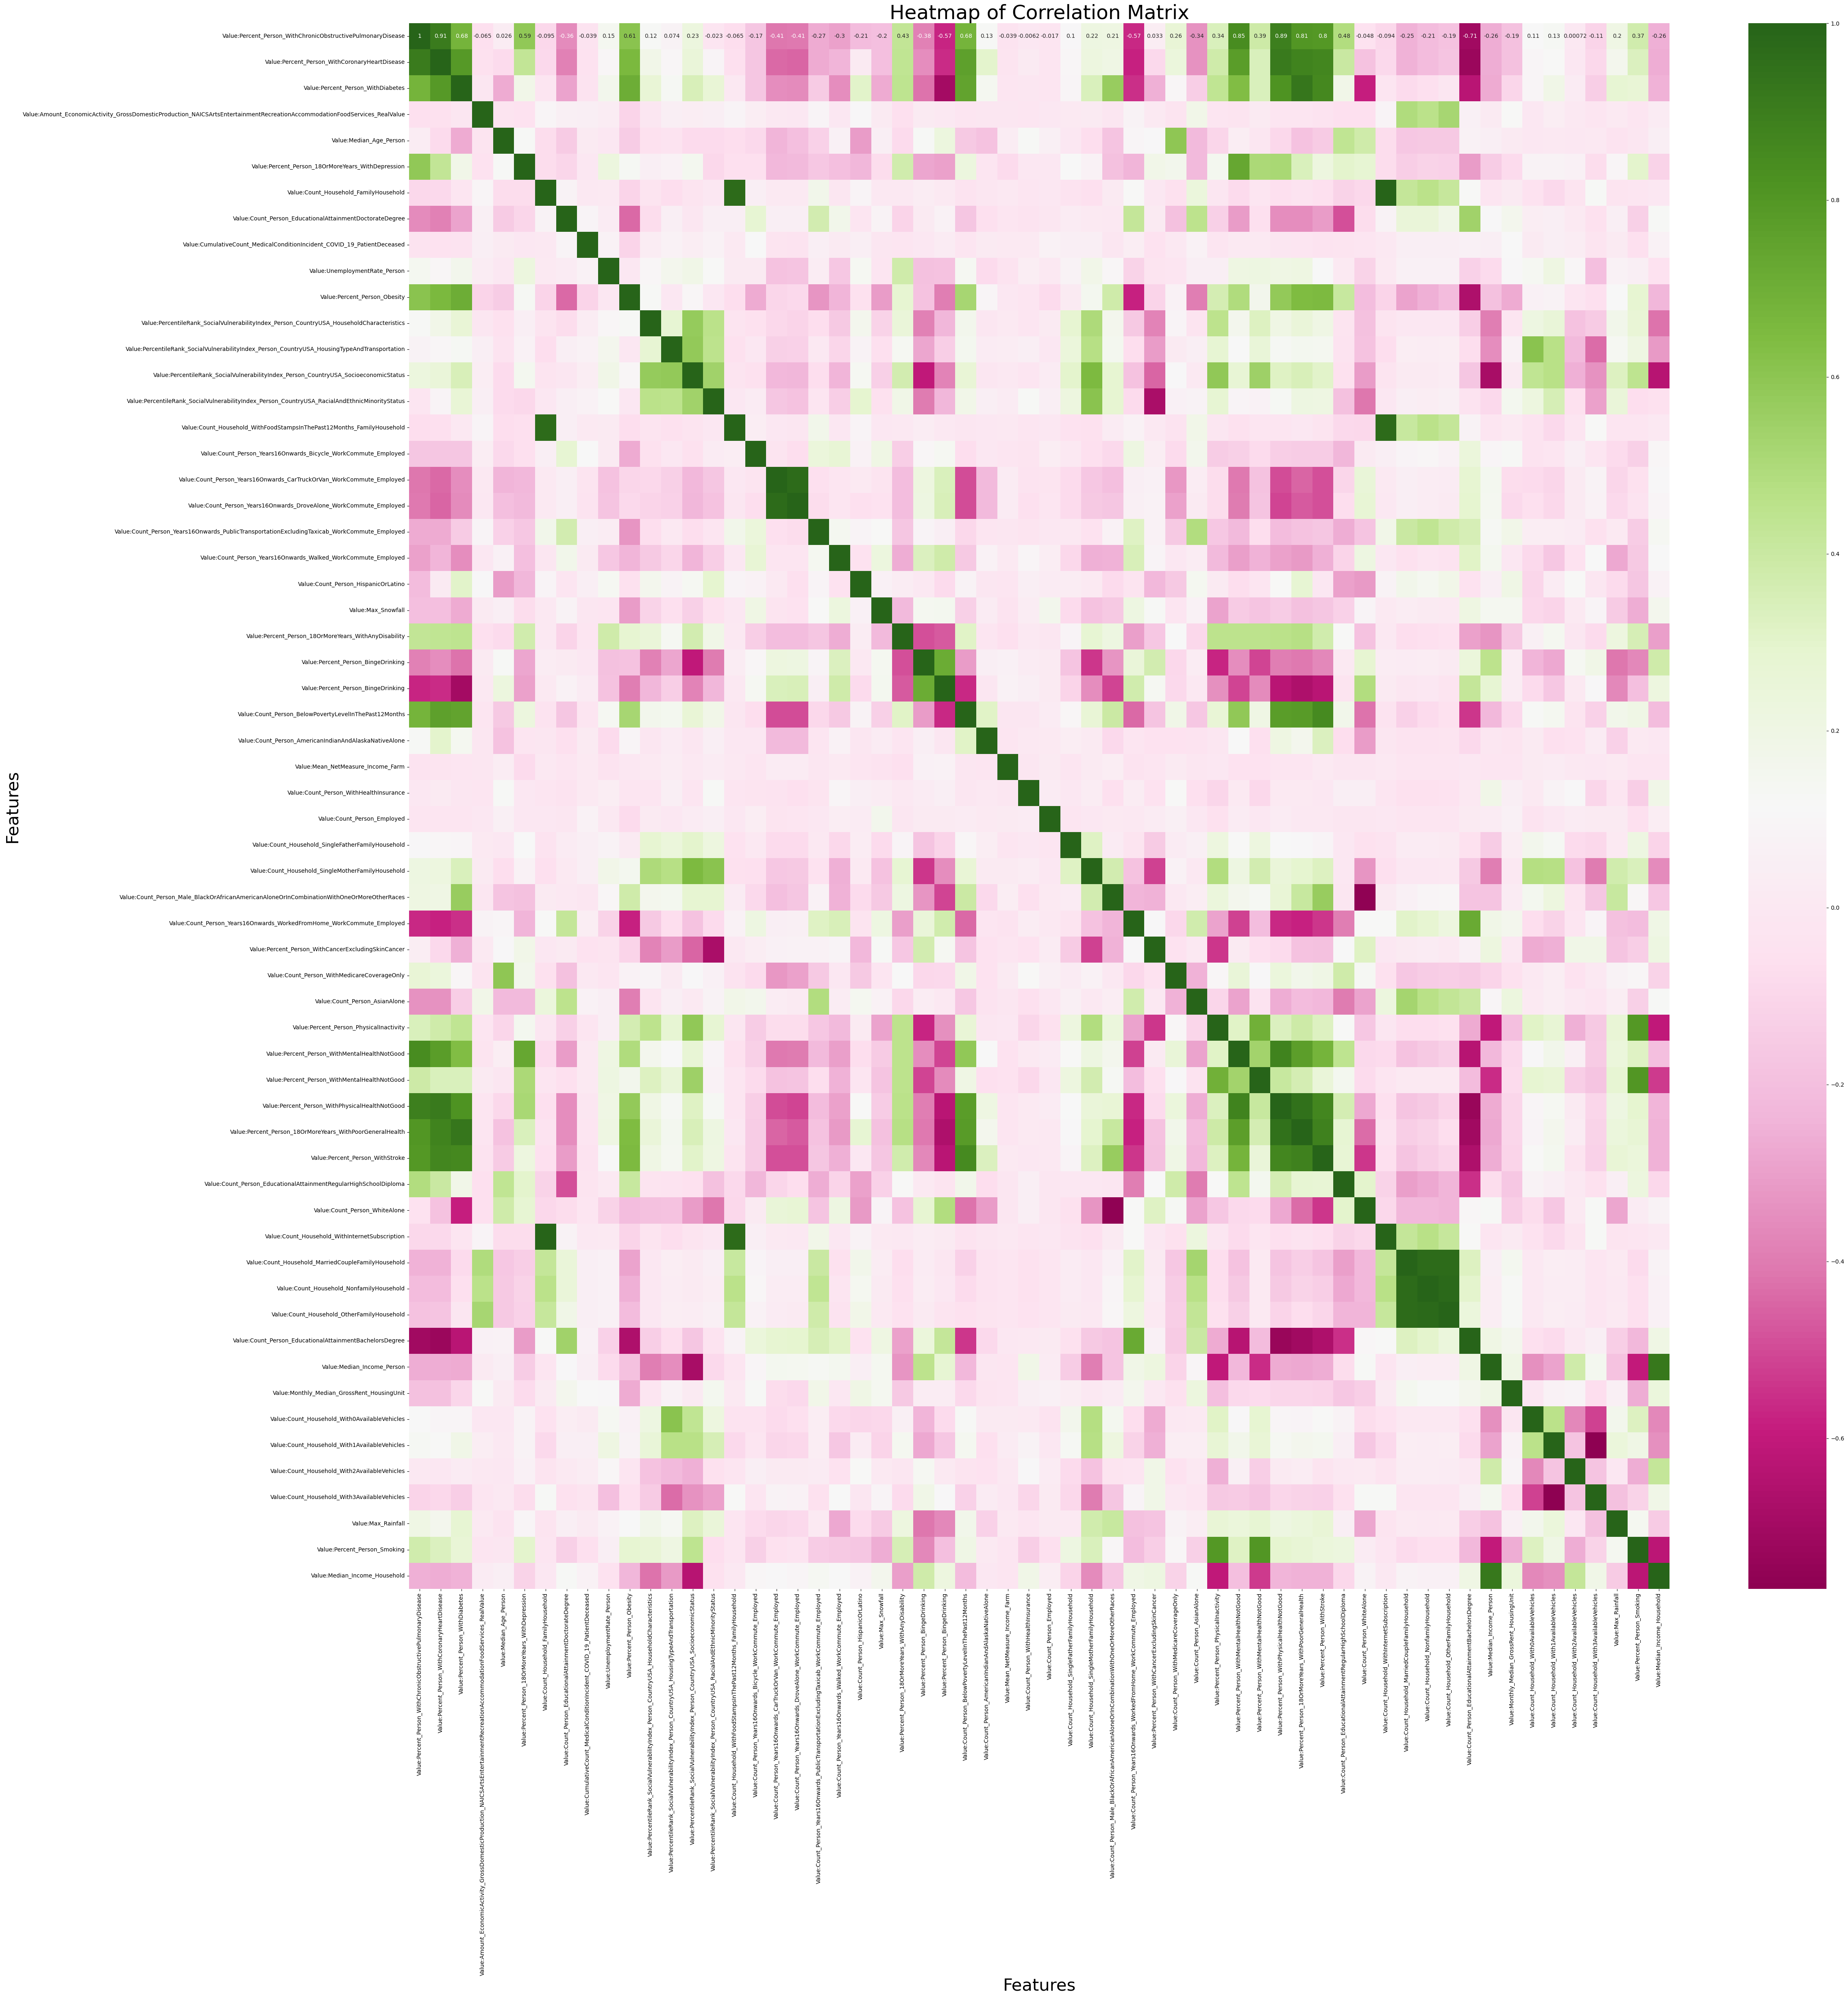

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(50, 50))

# Create the heatmap with increased annotation font size
sns.heatmap(
    df.corr(), 
    annot=True,          # Show annotations
    annot_kws={"size": 10},  # Increase annotation font size
    cmap='PiYG'
)

# Optionally increase axis labels and title font size
plt.xlabel("Features", fontsize=30)  # X-axis label font size
plt.ylabel("Features", fontsize=30)  # Y-axis label font size
plt.title("Heatmap of Correlation Matrix", fontsize=35)  # Title font size

# Display the heatmap
plt.show()

In [67]:
df

,Value:Percent_Person_WithChronicObstructivePulmonaryDisease,Value:Percent_Person_WithCoronaryHeartDisease,Value:Percent_Person_WithDiabetes,Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue,Value:Median_Age_Person,Value:Percent_Person_18OrMoreYears_WithDepression,Value:Count_Household_FamilyHousehold,Value:Count_Person_EducationalAttainmentDoctorateDegree,Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased,Value:UnemploymentRate_Person,Value:Percent_Person_Obesity,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HouseholdCharacteristics,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HousingTypeAndTransportation,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_SocioeconomicStatus,Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_RacialAndEthnicMinorityStatus,Value:Count_Household_WithFoodStampsInThePast12Months_FamilyHousehold,Value:Count_Person_Years16Onwards_Bicycle_WorkCommute_Employed,Value:Count_Person_Years16Onwards_CarTruckOrVan_WorkCommute_Employed,Value:Count_Person_Years16Onwards_DroveAlone_WorkCommute_Employed,Value:Count_Person_Years16Onwards_PublicTransportationExcludingTaxicab_WorkCommute_Employed,Value:Count_Person_Years16Onwards_Walked_WorkCommute_Employed,Value:Count_Person_HispanicOrLatino,Value:Max_Snowfall,Value:Percent_Person_18OrMoreYears_WithAnyDisability,Value:Percent_Person_BingeDrinking,Value:Percent_Person_BingeDrinking,Value:Count_Person_BelowPovertyLevelInThePast12Months,Value:Count_Person_AmericanIndianAndAlaskaNativeAlone,Value:Mean_NetMeasure_Income_Farm,Value:Count_Person_WithHealthInsurance,Value:Count_Person_Employed,Value:Count_Household_SingleFatherFamilyHousehold,Value:Count_Household_SingleMotherFamilyHousehold,Value:Count_Person_Male_BlackOrAfricanAmericanAloneOrInCombinationWithOneOrMoreOtherRaces,Value:Count_Person_Years16Onwards_WorkedFromHome_WorkCommute_Employed,Value:Percent_Person_WithCancerExcludingSkinCancer,Value:Count_Person_WithMedicareCoverageOnly,Value:Count_Person_AsianAlone,Value:Percent_Person_PhysicalInactivity,Value:Percent_Person_WithMentalHealthNotGood,Value:Percent_Person_WithMentalHealthNotGood,Value:Percent_Person_WithPhysicalHealthNotGood,Value:Percent_Person_18OrMoreYears_WithPoorGeneralHealth,Value:Percent_Person_WithStroke,Value:Count_Person_EducationalAttainmentRegularHighSchoolDiploma,Value:Count_Person_WhiteAlone,Value:Count_Household_WithInternetSubscription,Value:Count_Household_MarriedCoupleFamilyHousehold,Value:Count_Household_NonfamilyHousehold,Value:Count_Household_OtherFamilyHousehold,Value:Count_Person_EducationalAttainmentBachelorsDegree,Value:Median_Income_Person,Value:Monthly_Median_GrossRent_HousingUnit,Value:Count_Household_With0AvailableVehicles,Value:Count_Household_With1AvailableVehicles,Value:Count_Household_With2AvailableVehicles,Value:Count_Household_With3AvailableVehicles,Value:Max_Rainfall,Value:Percent_Person_Smoking,Value:Median_Income_Household
0,6.8,6.2,11.3,0.001180,0.430693,24.3,0.688677,0.007317,0.006745,0.092857,38.4,0.3675,0.2358,0.2367,0.6354,0.059127,0.000905,0.419997,0.386506,0.002716,0.002263,0.031209,0.000000,31.1,16.6,16.6,0.111007,0.000988,0.066971,0.891036,0.447561,0.033441,0.122288,0.105616,0.023987,7.1,0.063155,0.011017,25.7,18.0,18.0,12.1,17.7,3.2,0.167448,0.732462,0.891295,0.007978,0.006062,0.004719,0.112614,0.376480,0.372419,0.039806,0.317375,0.347006,0.191366,0.412222,15.4,0.330454
1,6.4,6.0,10.2,0.015859,0.547030,25.1,0.674842,0.009536,0.021267,0.100000,36.8,0.2883,0.4308,0.3433,0.4890,0.048666,0.000859,0.379177,0.349117,0.000429,0.005153,0.045471,0.000000,29.6,18.2,18.2,0.095100,0.003440,0.082619,0.846149,0.416832,0.031200,0.081771,0.045913,0.039077,7.5,0.074323,0.008299,23.8,18.2,18.2,12.1,17.0,2.8,0.154378,0.795024,0.891335,0.034366,0.025793,0.013940,0.135780,0.369787,0.356317,0.022643,0.310819,0.424506,0.167761,0.390201,14.7,0.348309
2,9.8,8.2,16.0,0.000459,0

In [77]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Initialize results
correlations = []
bestPos = []
bestNeg = []
alls = []

# Specify the target column
target_col = 'Value:Percent_Person_18OrMoreYears_WithDepression'

# Ensure the target column exists
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in DataFrame.")

# Loop through all other columns
for col in df.columns:
    if col == target_col:
        continue  # Skip the target column itself

    # Ensure both columns are numeric
    if not np.issubdtype(df[target_col].dtypes, np.number) or not np.issubdtype(df[col].dtypes, np.number):
        continue

    # Calculate Pearson correlation and p-value
    r, p = pearsonr(df[target_col], df[col])

    # Store the result
    correlations.append({"Column": col, "PCC": r, "p-value": p})

    # Categorize based on thresholds
    if r > 0.4 and p < 0.05:
        bestPos.append(col)
        alls.append(col)
    elif r < -0.4 and p < 0.05:
        bestNeg.append(col)
        alls.append(col)

# Convert correlations to a DataFrame
result = pd.DataFrame(correlations)

# Sort by Pearson correlation coefficient
result = result.sort_values(by="PCC", ascending=False)

# Display results
print(result)
print("\nBest Positively Correlated Columns:", bestPos)
print("\nBest Negatively Correlated Columns:", bestNeg)
print("\nAll Significant Columns:", alls)


                                               Column       PCC        p-value
0   Value:Percent_Person_WithChronicObstructivePul...  0.586148  1.860332e-247
36     Value:Percent_Person_WithPhysicalHealthNotGood  0.512876  5.228442e-180
1       Value:Percent_Person_WithCoronaryHeartDisease  0.429562  5.708596e-121
22  Value:Percent_Person_18OrMoreYears_WithAnyDisa...  0.371895   8.412654e-89
37  Value:Percent_Person_18OrMoreYears_WithPoorGen...  0.340220   1.027996e-73
39  Value:Count_Person_EducationalAttainmentRegula...  0.297467   5.687815e-56
53                       Value:Percent_Person_Smoking  0.295359   3.595149e-55
40                      Value:Count_Person_WhiteAlone  0.276260   3.229383e-48
8                       Value:UnemploymentRate_Person  0.231908   4.207782e-34
23  Value:Count_Person_BelowPovertyLevelInThePast1...  0.229329   2.295039e-33
38                    Value:Percent_Person_WithStroke  0.221843   2.802201e-31
32  Value:Percent_Person_WithCancerExcludingSkinCa..

In [71]:
columns

['Value:Percent_Person_WithChronicObstructivePulmonaryDisease',
 'Value:Percent_Person_WithCoronaryHeartDisease',
 'Value:Percent_Person_WithDiabetes',
 'Value:Amount_EconomicActivity_GrossDomesticProduction_NAICSArtsEntertainmentRecreationAccommodationFoodServices_RealValue',
 'Value:Median_Age_Person',
 'Value:Percent_Person_18OrMoreYears_WithDepression',
 'Value:Count_Household_FamilyHousehold',
 'Value:Count_Person_EducationalAttainmentDoctorateDegree',
 'Value:CumulativeCount_MedicalConditionIncident_COVID_19_PatientDeceased',
 'Value:UnemploymentRate_Person',
 'Value:Percent_Person_Obesity',
 'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HouseholdCharacteristics',
 'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_HousingTypeAndTransportation',
 'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_SocioeconomicStatus',
 'Value:PercentileRank_SocialVulnerabilityIndex_Person_CountryUSA_RacialAndEthnicMinorityStatus',
 'Value:Count_House

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

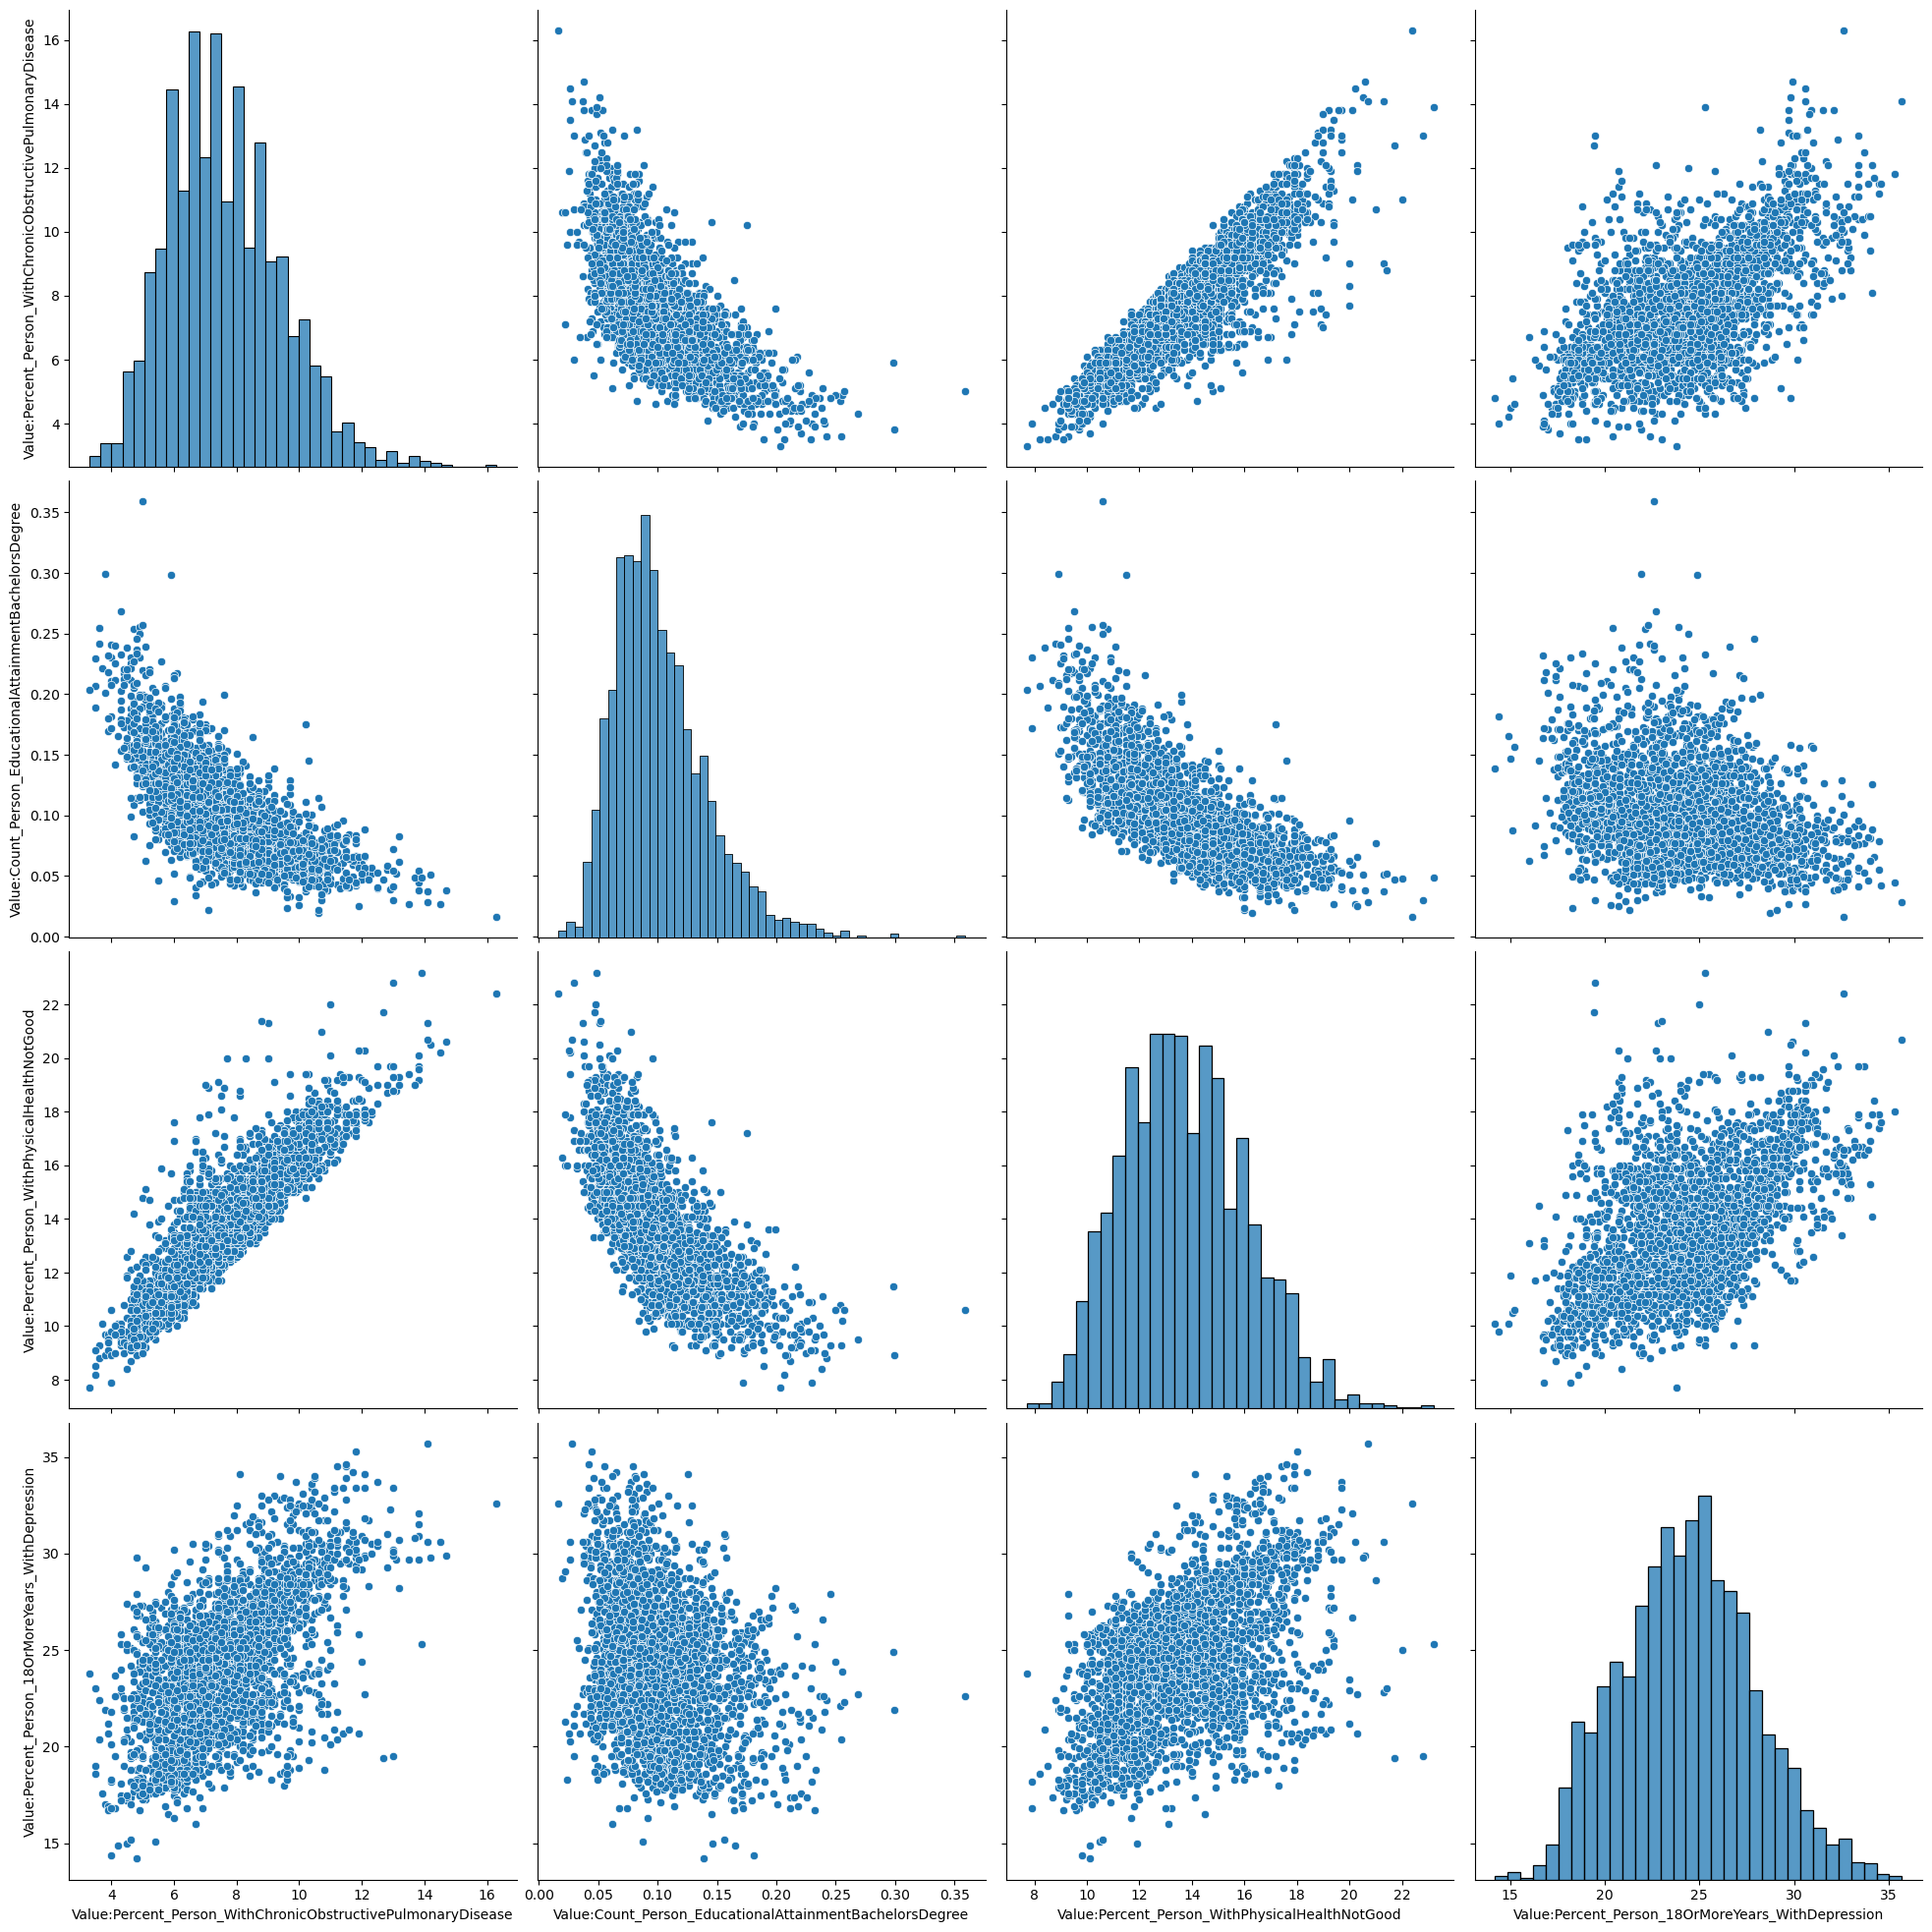

In [89]:
import seaborn as sns
columns_of_interest = ['Value:Percent_Person_WithChronicObstructivePulmonaryDisease', 'Value:Count_Person_EducationalAttainmentBachelorsDegree', 'Value:Percent_Person_WithPhysicalHealthNotGood', 'Value:Percent_Person_18OrMoreYears_WithDepression']


# Create the pairplot
sns.pairplot(df[columns_of_interest], height=5)


In [121]:
df2 = df.drop('Value:Percent_Person_18OrMoreYears_WithDepression',axis=1)

In [135]:
#Imports - not all were used
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
from sklearn.metrics import confusion_matrix
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D 
#create a dict to keep track of the accuracy of each model
accuracies = {}

X = df2.values
y = df['Value:Percent_Person_18OrMoreYears_WithDepression'].values
#split the dataset into 70-30 for training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
scoreList = []
# KNN Model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)  
knn.fit(x_train, y_train)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))
knn_predictions = knn.predict(x_test)
scoreList.append(knn.score(x_test, y_test))
acc = max(scoreList)*100
accuracies['KNN'] = acc



/var/folders/l1/5qmzrmh136j0vqg7b2jpx0180000gn/T/ipykernel_96128/3614106491.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


2 NN Score: 60.82%


In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 2)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
rf_predictions = rf.predict(x_test)


Random Forest Algorithm Accuracy Score : 83.87%


In [133]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100
accuracies['Linear Regression'] = acc
lr_predictions = lr.predict(x_test)
print("Accuracy of Linear Regression: {:.2f}%".format(acc))


Accuracy of Linear Regression: 78.23%


In [169]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lr_predictions)
print("R² Score:", r2)

R² Score: 0.7822557113832453


In [163]:
X

array([[ 6.8       ,  6.2       , 11.3       , ...,  0.41222222,
        15.4       ,  0.33045365],
       [ 6.4       ,  6.        , 10.2       , ...,  0.39020122,
        14.7       ,  0.34830857],
       [ 9.8       ,  8.2       , 16.        , ...,  0.42666667,
        21.9       ,  0.14297044],
       ...,
       [11.2       ,  7.8       , 13.1       , ...,  0.13779528,
        21.3       ,  0.22651626],
       [ 8.7       ,  6.7       , 11.3       , ...,  0.13429571,
        26.5       ,  0.27376231],
       [ 9.8       ,  7.1       , 12.5       , ...,  0.16535433,
        23.1       ,  0.15587003]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


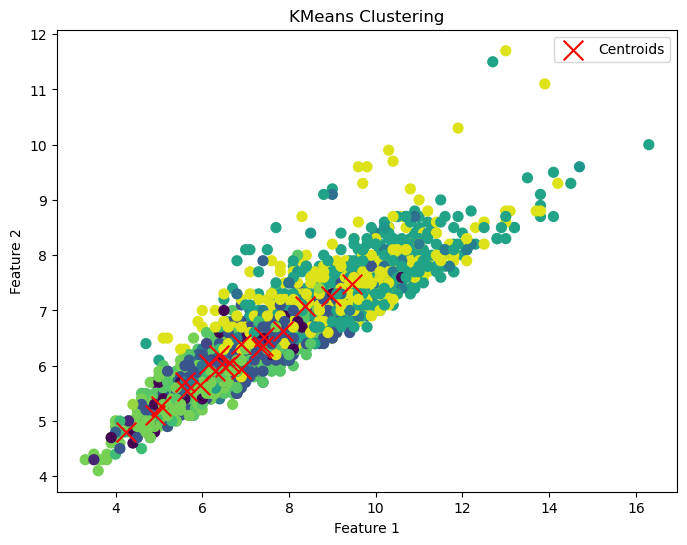

In [167]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = df2.values
kmeans = KMeans(n_clusters=20, random_state=42)  # Adjust `n_clusters` as needed
clusters = kmeans.fit_predict(df)

# Step 4: Add the cluster labels to the original DataFrame
df2['Cluster'] = clusters

# Step 5: Visualize the clusters (optional, for 2D or 3D data)
plt.figure(figsize=(8, 6))
plt.scatter(df[:, 0], df[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
